# Loading and Preparing Full Online Retail Data

<b> Load the online retail dataset file </b>

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mlxtend.frequent_patterns
import mlxtend.preprocessing

In [2]:
online = pd.read_excel(io='datasets/Online Retail.xlsx', sheet_name='Online Retail', header=0)
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<b> Clean and prepare the data for modeling, including turning the cleaned data into a list of lists </b>

In [3]:
# Create an indicator column stipulating whether the invoice number begins with "C"
online['IsCPresent'] = (online['InvoiceNo'].astype(str).apply(lambda x: 1 if x.find('C') != -1 else 0))

In [4]:
# Filter out all transactions having either zero or a negative number of items and 
# remove all invoice numbers starting with "C"
online1 = (online.loc[online["Quantity"] > 0])
online1 = (online1.loc[online['IsCPresent'] != 1])
online1 = (online1.loc[:, ["InvoiceNo", "Description"]].dropna())

In [6]:
invoice_no_list = online1.InvoiceNo.tolist()
invoice_no_list = list(set(invoice_no_list))
print(f"Length of list of invoice numbers: {len(invoice_no_list)}")
subset_invoice_no_list = invoice_no_list[0:5000]
online1 = online1.loc[online1["InvoiceNo"].isin(subset_invoice_no_list)]

Length of list of invoice numbers: 20136


In [7]:
# iterate over the unique invoice numbers and extract the item descriptions as a list
invoice_item_list = []

for num in list(set(online1.InvoiceNo.tolist())):
    temp_df = online1.loc[online1['InvoiceNo'] == num]
    temp_items = temp_df.Description.tolist()
    invoice_item_list.append(temp_items)

<b> Encode the data and recast it as a DataFrame </b>

In [8]:
# Initialize and fit the transaction encoder
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(invoice_item_list)
print(online_encoder_array)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [9]:
# Recast the encoded array as a DataFrame named online_encoder_df
online_encoder_df = pd.DataFrame(online_encoder_array, columns=online_encoder.columns_)

# Running the Apriori Algorithm on the Complete Online Retail Dataset

<b> Run the Apriori algorithm on the full data with reasonable parameter settings </b>

In [10]:
mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(online_encoder_df, min_support=0.01, use_colnames=True)
mod_colnames_minsupport.loc[0:6]

,support,itemsets
0,0.0110,( OVAL WALL MIRROR DIAMANTE )
1,0.0340,( SET 2 TEA TOWELS I LOVE LONDON )
2,0.0178,(10 COLOUR SPACEBOY PEN)
3,0.0126,(12 IVORY ROSE PEG PLACE SETTINGS)
4,0.0132,(12 MESSAGE CARDS WITH ENVELOPES)
5,0.0178,(12 PENCIL SMALL TUBE WOODLAND)
6,0.0276,(12 PENCILS SMALL TUBE RED RETROSPOT)


<b> Filter the results down to the item set containing 10 COLOUR SPACEBOY PEN </b>

In [11]:
mod_colnames_minsupport[mod_colnames_minsupport['itemsets'] == frozenset({'10 COLOUR SPACEBOY PEN'})]

,support,itemsets
2,0.0178,(10 COLOUR SPACEBOY PEN)


<b> Add another column containing the item set length. Then, filter down to those item sets whose length is two and whose support is in the range [0.02, 0.021] </b>

In [12]:
mod_colnames_minsupport['length'] = mod_colnames_minsupport['itemsets'].apply(lambda x: len(x))
mod_colnames_minsupport[(mod_colnames_minsupport['length'] == 2) &
                       (mod_colnames_minsupport['support'] >= 0.02) &
                       (mod_colnames_minsupport['support'] < 0.021)]

,support,itemsets,length
889,0.0200,"(6 RIBBONS RUSTIC CHARM, REGENCY CAKESTAND 3 T...",2
950,0.0208,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",2
1309,0.0200,"(DOTCOM POSTAGE, LUNCH BAG RED RETROSPOT)",2
1516,0.0208,"(SINGLE HEART ZINC T-LIGHT HOLDER, HANGING HEA...",2
1565,0.0206,"(HEART OF WICKER SMALL, JUMBO BAG RED RETROSPOT)",2
1640,0.0204,"(WHITE HANGING HEART T-LIGHT HOLDER, HOME BUIL...",2
1753,0.0206,"(JAM MAKING SET WITH JARS, REGENCY CAKESTAND 3...",2
1792,0.0206,"(JUMBO BAG OWLS, JUMBO BAG PINK POLKADOT)",2
1879,0.0208,"(RED RETROSPOT CHARLOTTE BAG, JUMBO BAG RED RE...",2
1944,0.0204,"(JUMBO STORAGE BAG SUKI, JUMBO BAG WOODLAND AN...",2


<b> Plot the support values </b>

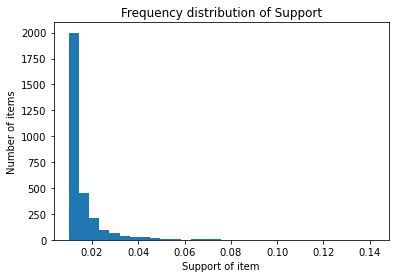

In [13]:
mod_colnames_minsupport.hist("support", grid=False, bins=30)
plt.xlabel("Support of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Support")
plt.show()

# Finding Association Rules on the Complete Online Retail Dataset

<b> Fit the association rule model on the full dataset. Use the confidence metric and a minimum threshold of 0.6 </b>

In [14]:
rules = mlxtend.frequent_patterns.association_rules(mod_colnames_minsupport,
                                                    metric="confidence",
                                                    min_threshold=0.6,
                                                    support_only=False)
rules.loc[0:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.0222,0.0276,0.0152,0.684685,24.807416,0.014587,3.083897
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.0208,0.0546,0.0140,0.673077,12.327416,0.012864,2.891812
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.0208,0.0520,0.0140,0.673077,12.943787,0.012918,2.899765
3,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.0268,0.0546,0.0164,0.611940,11.207698,0.014937,2.436223
4,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.0278,0.0546,0.0208,0.748201,13.703323,0.019282,3.754589
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.0520,0.0546,0.0358,0.688462,12.609186,0.032961,3.034617
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.0546,0.0520,0.0358,0.655678,12.609186,0.032961,2.753234


<b> Count the number of association rules </b>

In [15]:
print(f'Number of Associations: {rules.shape[0]}')

Number of Associations: 1064


<b> Plot confidence against support </b>

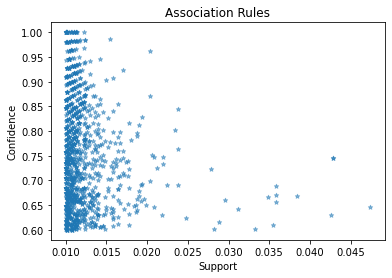

In [16]:
rules.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

<b> Look at the distributions of confidence, lift, leverage, and conviction </b>

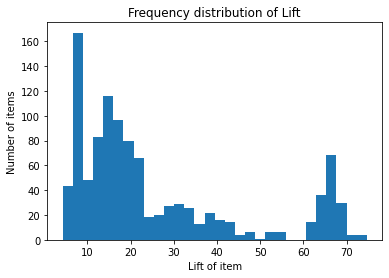

In [17]:
rules.hist("lift", grid=False, bins=30)
plt.xlabel("Lift of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Lift")
plt.show()

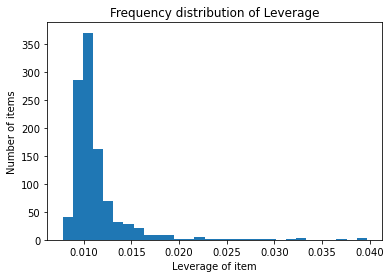

In [18]:
rules.hist("leverage", grid=False, bins=30)
plt.xlabel("Leverage of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Leverage")
plt.show()

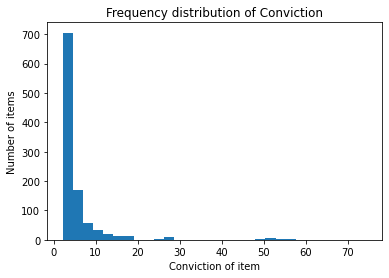

In [19]:
plt.hist(rules[np.isfinite(rules['conviction'])].conviction.values, bins = 30)
plt.xlabel("Conviction of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Conviction")
plt.show()